In [1]:
# move to project directory from notebooks subdirectory
%cd ..
%pwd

/tf/fiit_nn_project


'/tf/fiit_nn_project'

In [2]:
from src.data import load_data
from src.data import processing
import src.utils as utils
import matplotlib as plt
import numpy as np

In [3]:
plt.rcParams['figure.figsize'] = (15, 12)

In [4]:
# load data
val_x, val_y = load_data.load_dataset('data/compressed_data/compressed_images.npz')

# Example of labeled objects in image

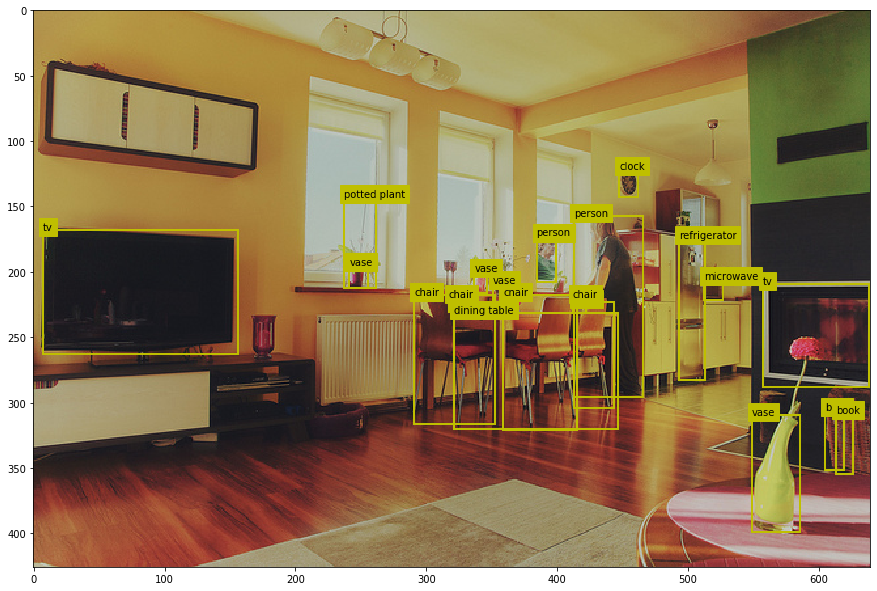

In [5]:
utils.plot_img_with_bboxes(val_x[0], val_y[0])

# Shape analysis

In this section we will focus on analysis of shapes of images in COCO dataset.

## Unique shapes

In [6]:
unique_shapes = np.unique(list(map(lambda x: x.shape, val_x)), axis=0, return_counts=True)

In [7]:
landscapes = 0
portraits = 0
for i in range(0, len(unique_shapes[0])):
    print(f'Shape: {unique_shapes[0][i]}, counts: {unique_shapes[1][i]}')
    if unique_shapes[0][i][0] > unique_shapes[0][i][1]:
        portraits += 1
    else:
        landscapes += 1

print(f'Num of landscapes: {landscapes}')
print(f'Num of portraits: {portraits}')

Shape: [240 320   3], counts: 2
Shape: [302 500   3], counts: 1
Shape: [315 640   3], counts: 1
Shape: [333 500   3], counts: 1
Shape: [349 640   3], counts: 1
Shape: [351 640   3], counts: 1
Shape: [359 640   3], counts: 1
Shape: [361 640   3], counts: 3
Shape: [363 640   3], counts: 1
Shape: [366 640   3], counts: 1
Shape: [375 500   3], counts: 5
Shape: [384 640   3], counts: 1
Shape: [396 500   3], counts: 1
Shape: [400 600   3], counts: 2
Shape: [419 640   3], counts: 1
Shape: [425 640   3], counts: 6
Shape: [426 640   3], counts: 4
Shape: [427 640   3], counts: 14
Shape: [428 640   3], counts: 1
Shape: [459 640   3], counts: 1
Shape: [480 640   3], counts: 17
Shape: [482 640   3], counts: 1
Shape: [483 640   3], counts: 1
Shape: [500 333   3], counts: 1
Shape: [500 375   3], counts: 4
Shape: [512 640   3], counts: 1
Shape: [531 640   3], counts: 1
Shape: [539 640   3], counts: 1
Shape: [555 640   3], counts: 1
Shape: [612 612   3], counts: 4
Shape: [640 424   3], counts: 1
Shape:

## Number of classes

### Number of classes in training dataset

In [8]:
from pycocotools.coco import COCO

coco = COCO(annotation_file='data/annotations_trainval2017/annotations/instances_train2017.json')

loading annotations into memory...
Done (t=14.56s)
creating index...
index created!


In [9]:
valid_coco = COCO(annotation_file='data/annotations_trainval2017/annotations/instances_val2017.json')

loading annotations into memory...
Done (t=0.52s)
creating index...
index created!


In [10]:
ann_ids = coco.getAnnIds()
anns = coco.loadAnns(ids=ann_ids)

In [23]:
unique_classes = {}
for ann in anns:
    if ann['category_id'] not in unique_classes:
        unique_classes[ann['category_id']] = 1
    else:
        unique_classes[ann['category_id']] += 1
            
print(f'Overall number of categories: {len(unique_classes)}')
print()
for i, (key, value) in enumerate(sorted(unique_classes.items(), key=lambda kv: kv[1], reverse=True)):
    cat = coco.loadCats(ids=[key])[0]
    print(f'{i+1:2}. {cat["name"]}: {value}')

Overall number of categories: 80

 1. person: 262465
 2. car: 43867
 3. chair: 38491
 4. book: 24715
 5. bottle: 24342
 6. cup: 20650
 7. dining table: 15714
 8. bowl: 14358
 9. traffic light: 12884
10. handbag: 12354
11. umbrella: 11431
12. bird: 10806
13. boat: 10759
14. truck: 9973
15. bench: 9838
16. sheep: 9509
17. banana: 9458
18. kite: 9076
19. motorcycle: 8725
20. backpack: 8720
21. potted plant: 8652
22. cow: 8147
23. wine glass: 7913
24. carrot: 7852
25. knife: 7770
26. broccoli: 7308
27. donut: 7179
28. bicycle: 7113
29. skis: 6646
30. vase: 6613
31. horse: 6587
32. tie: 6496
33. cell phone: 6434
34. orange: 6399
35. cake: 6353
36. sports ball: 6347
37. clock: 6334
38. suitcase: 6192
39. spoon: 6165
40. surfboard: 6126
41. bus: 6069
42. apple: 5851
43. pizza: 5821
44. tv: 5805
45. couch: 5779
46. remote: 5703
47. sink: 5610
48. skateboard: 5543
49. elephant: 5513
50. dog: 5508
51. fork: 5479
52. zebra: 5303
53. airplane: 5135
54. giraffe: 5131
55. laptop: 4970
56. tennis rac

In [11]:
valid_ann_ids = valid_coco.getAnnIds()
valid_anns = valid_coco.loadAnns(ids=valid_ann_ids)

unique_classes = {}
for ann in valid_anns:
    if ann['category_id'] not in unique_classes:
        unique_classes[ann['category_id']] = 1
    else:
        unique_classes[ann['category_id']] += 1
            
print(f'Overall number of categories: {len(unique_classes)}')
print()
for i, (key, value) in enumerate(sorted(unique_classes.items(), key=lambda kv: kv[1], reverse=True)):
    cat = coco.loadCats(ids=[key])[0]
    print(f'{i+1:2}. {cat["name"]}: {value}')

Overall number of categories: 80

 1. person: 11004
 2. car: 1932
 3. chair: 1791
 4. book: 1161
 5. bottle: 1025
 6. cup: 899
 7. dining table: 697
 8. traffic light: 637
 9. bowl: 626
10. handbag: 540
11. bird: 440
12. boat: 430
13. truck: 415
14. umbrella: 413
15. bench: 413
16. cow: 380
17. banana: 379
18. motorcycle: 371
19. carrot: 371
20. backpack: 371
21. sheep: 361
22. potted plant: 343
23. wine glass: 343
24. donut: 338
25. kite: 336
26. knife: 326
27. bicycle: 316
28. broccoli: 316
29. cake: 316
30. suitcase: 303
31. tv: 288
32. orange: 287
33. bus: 285
34. pizza: 285
35. remote: 283
36. vase: 277
37. horse: 273
38. surfboard: 269
39. zebra: 268
40. clock: 267
41. sports ball: 263
42. cell phone: 262
43. couch: 261
44. elephant: 255
45. tie: 254
46. spoon: 253
47. skis: 241
48. apple: 239
49. giraffe: 232
50. laptop: 231
51. sink: 225
52. tennis racket: 225
53. dog: 218
54. fork: 215
55. cat: 202
56. teddy bear: 191
57. train: 190
58. skateboard: 179
59. toilet: 179
60. sand

## Average number of objects per image

In [8]:
img_ids = coco.getImgIds()
anns_for_img_ids = coco.getAnnIds(imgIds=img_ids)
print(f'Average number of annotations per image: {len(anns_for_img_ids) / len(img_ids)}')

Average number of annotations per image: 7.27046082832433


## Number of portrait and landscape images per object category

In [34]:
# unique_classes = {'category': {'landscape': num, 'portrait': num}}
unique_classes = {}
for i in range(0, len(val_x)):
    
    image_annotations = {}  # serves as check if image for given category has already been counted
    for annotation in val_y[i]:
        if annotation[1] not in image_annotations:
            image_annotations[annotation[1]] = True
            if annotation[1] not in unique_classes:
                landscape = 1 if val_x[i].shape[0] <= val_x[i].shape[1] else 0
                portrait = 1 if val_x[i].shape[0] > val_x[i].shape[1] else 0
                
                unique_classes[annotation[1]] = {
                    'landscape': landscape, 
                    'portrait': portrait,
                    'image_indexes': [i]
                }
            else:
                if val_x[i].shape[0] > val_x[i].shape[1]:
                    unique_classes[annotation[1]]['portrait'] += 1
                else:
                    unique_classes[annotation[1]]['landscape'] += 1
                unique_classes[annotation[1]]['image_indexes'].append(i)
            
for key, value in unique_classes.items():
    landscape_percentage = value["landscape"] / len(value["image_indexes"]) * 100
    portrait_percentage = value["portrait"] / len(value["image_indexes"]) * 100
    print(f'{key}')
    print(f'landscape: {value["landscape"]} {landscape_percentage}%')
    print(f'portrait: {value["portrait"]} {portrait_percentage}%')
    print()

potted plant
landscape: 2 100.0%
portrait: 0 0.0%

tv
landscape: 5 71.42857142857143%
portrait: 2 28.57142857142857%

chair
landscape: 8 100.0%
portrait: 0 0.0%

person
landscape: 42 72.41379310344827%
portrait: 16 27.586206896551722%

microwave
landscape: 2 100.0%
portrait: 0 0.0%

refrigerator
landscape: 2 66.66666666666666%
portrait: 1 33.33333333333333%

book
landscape: 2 100.0%
portrait: 0 0.0%

clock
landscape: 3 60.0%
portrait: 2 40.0%

vase
landscape: 3 100.0%
portrait: 0 0.0%

dining table
landscape: 8 80.0%
portrait: 2 20.0%

bear
landscape: 0 0.0%
portrait: 1 100.0%

bed
landscape: 3 75.0%
portrait: 1 25.0%

stop sign
landscape: 0 0.0%
portrait: 1 100.0%

truck
landscape: 5 71.42857142857143%
portrait: 2 28.57142857142857%

car
landscape: 6 75.0%
portrait: 2 25.0%

teddy bear
landscape: 0 0.0%
portrait: 1 100.0%

skis
landscape: 3 60.0%
portrait: 2 40.0%

oven
landscape: 1 50.0%
portrait: 1 50.0%

sports ball
landscape: 0 0.0%
portrait: 1 100.0%

baseball glove
landscape: 1 

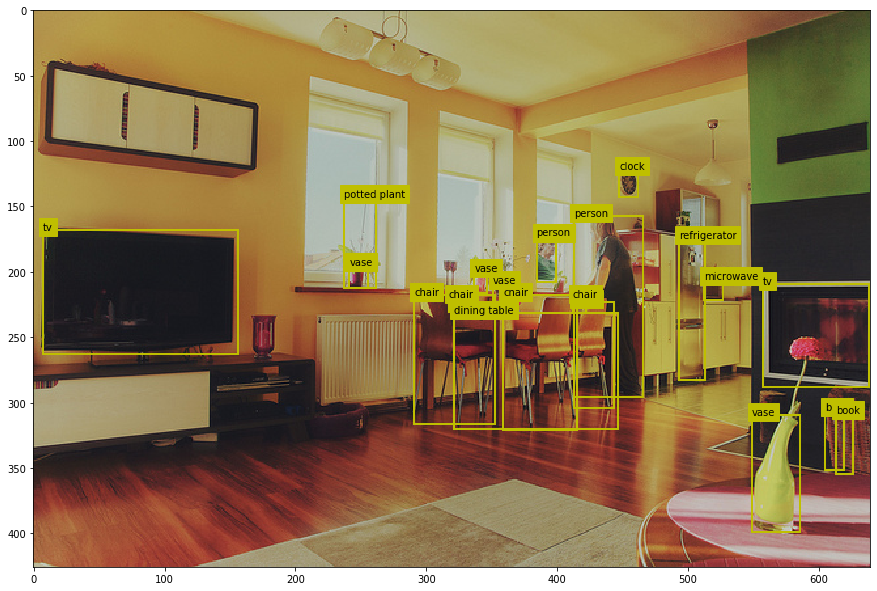

In [35]:
utils.plot_img_with_bboxes(val_x[0], val_y[0])

# Conclusion

We discovered that average number of objects per image in training dataset is 7. Because number of objects per image is small, we will not use anchor boxes.

We also focused on how many object classes there are in train dataset and on frequency of those categories. We discovered that there are truly 80 categories, as is written in the documentation for dataset. We also noticed that most frequent object in dataset is **person** and therefore we will use this class of objects for initial experiments.

In order to discover whether we can manipulate images by rotating them, so our model has to learn features representing specific object we analyzed in how many landscape and portrait images different objects are. However, we did this only on validation dataset, because training dataset is too large to load all images into RAM and we do not have partial loading from memory currently.